In [1]:
import os as os
import sys as sys
import glob as glob
import math as math
import numpy as np
import scipy as sc
import subprocess as subprocess
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import genfromtxt
from scipy import stats
from functools import reduce
from shutil import copyfile
%load_ext autoreload
%autoreload 2

In [2]:
import parmed as pmd
import pytraj as pt
print(pmd.__version__)
print(pt.__version__)

2.5.1+94.g1348a5e
1.0.8.dev0+86bb5af


In [3]:
from modify import *
from prepare import *
from properties import *
from simulate import *

In [12]:

simulation_root = '/home/dslochower/data/projects/QMFF/qmff-explorations/density/'
this_simulation_directory = 'ethanol-loop/'
experimental_density = 0.7893


reference_parameter_file = 'full.topo'
reference_parameters = pmd.load_file(simulation_root + reference_parameter_file)
# These two parameters can be linked.
atom = '@%oh'
atom_index = 1

reference_mdin_file = 'mdin-10ps'
reference_coordinate_file = 'full.crds'
reference_parameter_file = 'full.topo'
trajectory_file = 'traj.001'

immutable = deepcopy(reference_parameters)
# Reference needs to be an object deepcopy so they don't get modified!


NameError: name 'deepcopy' is not defined

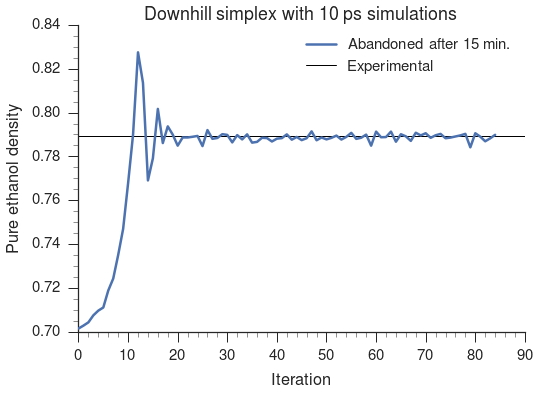

In [139]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(densities)), densities, zorder=10, label='Abandoned after 15 min.')
ax.axhline(experimental_density, c='k', lw=1, label='Experimental')
ax.set_title('Downhill simplex with 10 ps simulations')
ax.set_xlabel('Iteration')
ax.set_ylabel('Pure ethanol density')
ax.legend()
fetching_plot(fig)

In [5]:
reference_parameters.LJ_depth

[0.10939999991572774,
 0.2104000002486992,
 0.01570000002623629,
 0.01570000009846142,
 0]

In [6]:
reference_parameters.LJ_types

{'c3': 1, 'h1': 4, 'hc': 3, 'ho': 5, 'oh': 2}

In [7]:
reference_parameters.LJ_radius

[1.9080000000152688,
 1.7209999997862238,
 1.4869999997254757,
 1.3869999991698632,
 0]

In [8]:
print(reference_parameters.LJ_depth[1], 2*reference_parameters.LJ_radius[1])

0.2104000002486992 3.4419999995724475


In [15]:
def run_optimize(value):
    os.chdir(simulation_root)
    reference_parameters = pmd.load_file(simulation_root + reference_parameter_file)

    # At this point, only change the radius, keep epsilon the same.
    new_parameters = manipulate_lj(reference_parameters, atom, value[0], 
                                   reference_parameters.LJ_depth[atom_index])
    
    prepare_simulation_files(this_simulation_directory,
                            reference_mdin_file, reference_coordinate_file, new_parameters)
    
    os.chdir(this_simulation_directory)
    
    simulate(new_parameters, trajectory_file)
    
    density, difference = get_density(new_parameters, 
                       trajectory_file, 
                       experimental_density, debug=False)
    print('{} \t {}'.format(value[0], density))
    values.append(value[0])
    densities.append(density)
    
    os.chdir(simulation_root)
    return difference

In [15]:
def run_optimize(value, *args):
    os.chdir(simulation_root)
    reference_parameters = pmd.load_file(simulation_root + reference_parameter_file)

    new_parameters = manipulate_lj(reference_parameters, atom, value[0], 
                                   value[1])
    
    prepare_simulation_files(this_simulation_directory,
                            reference_mdin_file, reference_coordinate_file, new_parameters)
    
    os.chdir(this_simulation_directory)
    
    simulate(new_parameters, trajectory_file)
    
    density, difference = get_density(new_parameters, 
                       trajectory_file, 
                       experimental_density, debug=False)
    print('{} \t {} \t {} \t {}'.format(value[0], value[1], density, difference))
    values.append((value[0], value[1]))
    densities.append(density)
    
    os.chdir(simulation_root)
    return difference

In [16]:
values = []
densities = []
simulation_root = '/home/dslochower/data/projects/QMFF/qmff-explorations/density/'
this_simulation_directory = 'ethanol-loop/'
reference_parameter_file = 'full.topo'
reference_mdin_file = 'mdin-10ps'
reference_coordinate_file = 'full.crds'
reference_parameter_file = 'full.topo'
trajectory_file = 'traj.001'
reference_parameters = pmd.load_file(simulation_root + reference_parameter_file)
atom = '@%oh'
experimental_density = 0.7893

args = (simulation_root, reference_parameter_file, reference_parameters, atom, this_simulation_directory,
       reference_mdin_file, reference_coordinate_file, trajectory_file, experimental_density, )
sc.optimize.fmin(run_optimize, [(1.7210, 0.2104)], args = (simulation_root, reference_parameter_file, reference_parameters, atom, this_simulation_directory,
       reference_mdin_file, reference_coordinate_file, trajectory_file, experimental_density, ))

1.721 	 0.2104 	 0.7365604174927735 	 0.052739582507226546
1.8070500000000003 	 0.2104 	 0.7197231306154955 	 0.06957686938450447
1.721 	 0.22092 	 0.7370733526026356 	 0.05222664739736438
1.63495 	 0.22092000000000003 	 0.7505669541808838 	 0.038733045819116185
1.5488999999999997 	 0.2261800000000001 	 0.756447369472584 	 0.03285263052741605
1.5488999999999997 	 0.2367000000000001 	 0.758996593064919 	 0.030303406935081045
1.4628499999999995 	 0.24985000000000018 	 0.7640759969392371 	 0.02522400306076289
1.2907499999999992 	 0.2551100000000003 	 0.7625037391183548 	 0.026796260881645217
1.204699999999999 	 0.2787800000000004 	 0.7600174529234535 	 0.02928254707654654
1.2907499999999992 	 0.26563000000000037 	 0.7623967828670826 	 0.026903217132917434
1.4628499999999995 	 0.23933000000000015 	 0.761700364614293 	 0.027599635385706978
1.3337749999999993 	 0.2590550000000003 	 0.7614726490509071 	 0.027827350949092944
1.3767999999999994 	 0.25248000000000026 	 0.7637603872201688 	 0.025

array([ 1.33377501,  0.264315  ])

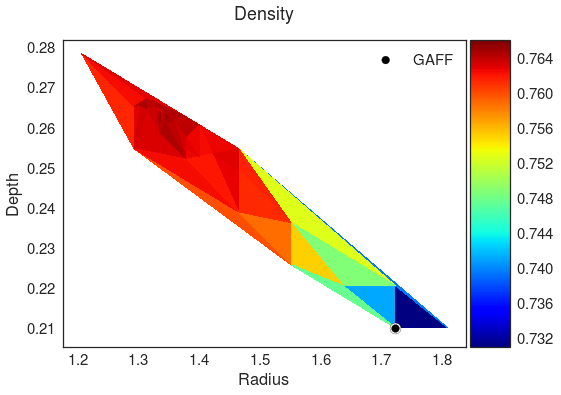

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot_scan(ax, np.array([values[i][0] for i in range(len(values))]), np.array([values[i][1] for i in range(len(values))]), np.array(densities),
         'Radius', 'Depth', 'Density', trip=True, ylog=False, xlog=False)
ax.scatter(1.721, 0.2104, s=60, c='k', label='GAFF', zorder=10)
ax.scatter(1.721, 0.2104, s=120, c='w', zorder=9)
ax.legend()

# Grid search!

## First, two singles

In [99]:
values = []
densities = []
simulation_root = '/home/dslochower/data/projects/QMFF/qmff-explorations/density/'
this_simulation_directory = 'ethanol-loop/'
reference_parameter_file = 'full.topo'
reference_mdin_file = 'mdin-10ps'
reference_coordinate_file = 'full.crds'
reference_parameter_file = 'full.topo'
trajectory_file = 'traj.001'
reference_parameters = pmd.load_file(simulation_root + reference_parameter_file)
atom = '@%oh'
experimental_density = 0.7893

args = (simulation_root, reference_parameter_file, reference_parameters, atom, this_simulation_directory,
       reference_mdin_file, reference_coordinate_file, trajectory_file, experimental_density, )

for i in np.arange(1.2, 1.8, 0.1):
        run_optimize([i, 0.2104], args)
radii = np.hstack(([values[0] for _ in values]

1.2 	 0.2104 	 0.7516218637396948 	 0.03767813626030525
1.3 	 0.2104 	 0.758189902206233 	 0.031110097793767055
1.4000000000000001 	 0.2104 	 0.7632522747567453 	 0.026047725243254716
1.5000000000000002 	 0.2104 	 0.7595160927103531 	 0.02978390728964686
1.6000000000000003 	 0.2104 	 0.7549638884762824 	 0.03433611152371763
1.7000000000000004 	 0.2104 	 0.7404091579046238 	 0.0488908420953762
1.8000000000000005 	 0.2104 	 0.7200212275386818 	 0.0692787724613182


ValueError: all the input arrays must have same number of dimensions

In [119]:
# [values[i][0] for i in range(len(values))]
# for i in range(len(values)):
#     print(values[i][0])
# for e in values:
#     print(e[0])
    
radii = np.vstack(([radius[0] for radius in values], densities))
print(radii)

[[ 1.2         1.3         1.4        ...,  1.6         1.7         1.8       ]
 [ 0.75162186  0.7581899   0.76325227 ...,  0.75496389  0.74040916
   0.72002123]]


In [120]:
values = []
densities = []
simulation_root = '/home/dslochower/data/projects/QMFF/qmff-explorations/density/'
this_simulation_directory = 'ethanol-loop/'
reference_parameter_file = 'full.topo'
reference_mdin_file = 'mdin-10ps'
reference_coordinate_file = 'full.crds'
reference_parameter_file = 'full.topo'
trajectory_file = 'traj.001'
reference_parameters = pmd.load_file(simulation_root + reference_parameter_file)
atom = '@%oh'
experimental_density = 0.7893

args = (simulation_root, reference_parameter_file, reference_parameters, atom, this_simulation_directory,
       reference_mdin_file, reference_coordinate_file, trajectory_file, experimental_density, )

for j in np.arange(0.20, 0.28, 0.01):
        run_optimize([1.7209, j], args)
# epsilon = values
epsilon = np.vstack(([epsilon[1] for epsilon in values], densities))
print(epsilon)

1.7209 	 0.2 	 0.7369026060926598 	 0.05239739390734022
1.7209 	 0.21000000000000002 	 0.7378717357460459 	 0.05142826425395408
1.7209 	 0.22000000000000003 	 0.7398619885909842 	 0.049438011409015825
1.7209 	 0.23000000000000004 	 0.7379496862029853 	 0.05135031379701471
1.7209 	 0.24000000000000005 	 0.7356124358479506 	 0.05368756415204945
1.7209 	 0.25000000000000006 	 0.7386263168311895 	 0.05067368316881049
1.7209 	 0.26000000000000006 	 0.7409806087223633 	 0.048319391277636736
1.7209 	 0.2700000000000001 	 0.7379590205461354 	 0.05134097945386462
1.7209 	 0.2800000000000001 	 0.7389886183017401 	 0.05031138169825988
[[ 0.2         0.21        0.22       ...,  0.26        0.27        0.28      ]
 [ 0.73690261  0.73787174  0.73986199 ...,  0.74098061  0.73795902
   0.73898862]]


## Now, the double

In [121]:
values = []
densities = []
simulation_root = '/home/dslochower/data/projects/QMFF/qmff-explorations/density/'
this_simulation_directory = 'ethanol-loop/'
reference_parameter_file = 'full.topo'
reference_mdin_file = 'mdin-10ps'
reference_coordinate_file = 'full.crds'
reference_parameter_file = 'full.topo'
trajectory_file = 'traj.001'
reference_parameters = pmd.load_file(simulation_root + reference_parameter_file)
atom = '@%oh'
experimental_density = 0.7893

args = (simulation_root, reference_parameter_file, reference_parameters, atom, this_simulation_directory,
       reference_mdin_file, reference_coordinate_file, trajectory_file, experimental_density, )

for i in np.arange(1.2, 1.8, 0.1):
    for j in np.arange(0.20, 0.28, 0.01):
        run_optimize([i, j], args)

1.2 	 0.2 	 0.7517707070289207 	 0.03752929297107932
1.2 	 0.21000000000000002 	 0.7506370548071402 	 0.03866294519285984
1.2 	 0.22000000000000003 	 0.7556724463086055 	 0.033627553691394474
1.2 	 0.23000000000000004 	 0.7585958370073367 	 0.03070416299266332
1.2 	 0.24000000000000005 	 0.7544551095043454 	 0.034844890495654646
1.2 	 0.25000000000000006 	 0.7564640084376029 	 0.03283599156239714
1.2 	 0.26000000000000006 	 0.7563827743701387 	 0.032917225629861324
1.2 	 0.2700000000000001 	 0.7563141602009257 	 0.032985839799074324
1.2 	 0.2800000000000001 	 0.7592012419072169 	 0.030098758092783062
1.3 	 0.2 	 0.76023936520849 	 0.02906063479151
1.3 	 0.21000000000000002 	 0.7593094191565161 	 0.02999058084348394
1.3 	 0.22000000000000003 	 0.760453913927271 	 0.028846086072728983
1.3 	 0.23000000000000004 	 0.7616081969717361 	 0.027691803028263906
1.3 	 0.24000000000000005 	 0.7629819989256273 	 0.026318001074372654
1.3 	 0.25000000000000006 	 0.7608143297176254 	 0.028485670282374

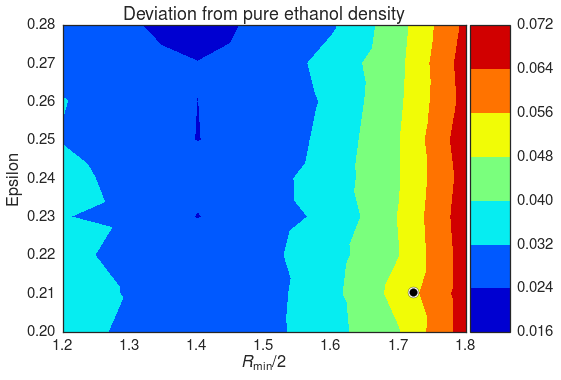

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.tricontourf(np.array([values[i][0] for i in range(len(values))]), 
               np.array([values[i][1] for i in range(len(values))]), 
               experimental_density - np.array(densities),
              cmap=mpl.cm.jet)
ax.set_xlabel(r'$R_\text{min}$/2')
ax.set_ylabel('Epsilon')
ax.set_title('Deviation from pure ethanol density')
ax.scatter(1.721, 0.2104, s=60, c='k', label='GAFF', zorder=10)
ax.scatter(1.721, 0.2104, s=120, c='w', zorder=9)
# ax.legend()
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
ax.margins(x=0, y=0)

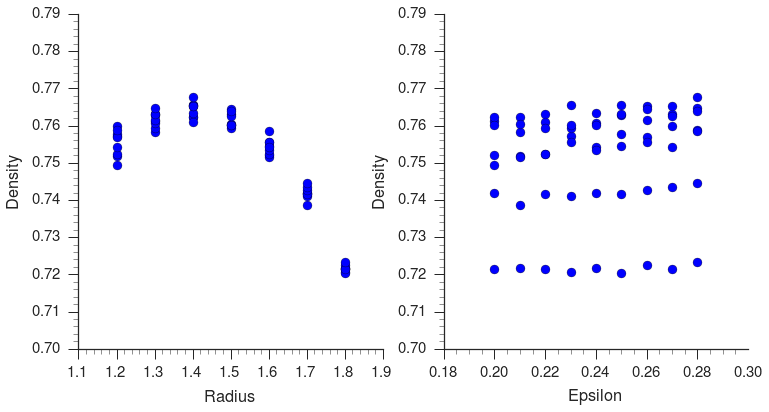

In [84]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter([values[i][0] for i in range(len(values))], densities, s=80)
ax1.set_xlabel('Radius')
ax1.set_ylabel('Density')

ax2.scatter([values[i][1] for i in range(len(values))], densities, s=80)
ax2.set_xlabel('Epsilon')
ax2.set_ylabel('Density')

fetching_plot(fig)


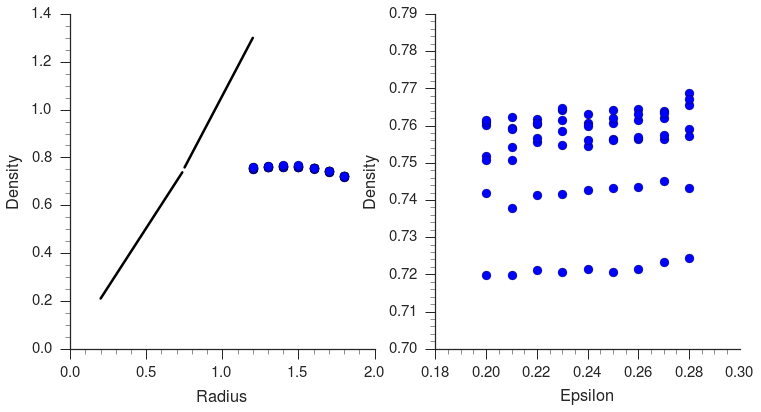

In [122]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter([values[i][0] for i in range(len(values))], densities, s=80)
ax1.plot(radii[:, 0], radii[:, 1], c='k')
ax1.set_xlabel('Radius')
ax1.set_ylabel('Density')

ax2.scatter([values[i][1] for i in range(len(values))], densities, s=80)
ax1.plot(epsilon[:, 0], epsilon[:, 1], c='k')
ax2.set_xlabel('Epsilon')
ax2.set_ylabel('Density')

fetching_plot(fig)


In [123]:
radii[:, 0]

array([ 1.2       ,  0.75162186])